In [17]:
{-# LANGUAGE NoMonomorphismRestriction FlexibleContexts #-}
import Diagrams.Prelude     hiding (gray)
import Data.List.Split      (chunksOf)
import Data.Maybe           (catMaybes)
import Control.Applicative
import Data.Monoid          (mconcat)
import Data.List            (transpose)

`gray n` recursively generates an n-bit Gray code, where each n-bit
binary number differs from the next in exactly one position.



In [18]:
gray 0 = [[]]
gray n = map (False:) g ++ map (True:) (reverse g)
  where g = gray (n-1)

Construct a circular diagram from the n-bit gray code: each bit
position corresponds to a concentric ring, with black/white indicating
0/1.  `ringOffsets` converts a list of booleans into a list of angular
segments corresponding to consecutive runs of `True`.



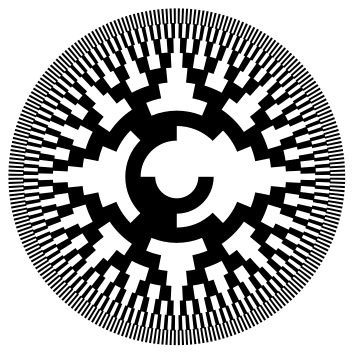

In [19]:
rings n = mkRingsDia . map ringOffsets . transpose . gray $ n
  where ringOffsets :: [Bool] -> [(Direction V2 Double, Angle Double)]
        ringOffsets = map l2t . chunksOf 2 . findEdges . zip [rotate α xDir | α <- [0 @@ turn, 1/(2^n) @@ turn .. fullTurn]]
        l2t [x,y] =  (x, angleBetweenDirs x y)
        l2t [x]   = (x, angleBetweenDirs x xDir) -- arc angle will never be > fullturn ^/ 2

findEdges :: Eq a => [(Direction V2 Double, a)] -> [Direction V2 Double]
findEdges = catMaybes . (zipWith edge <*> tail)
  where edge (_,c1) (a,c2) | c1 /= c2  = Just a
                           | otherwise = Nothing
                           
mkRingsDia = mconcat . zipWith mkRingDia [2,3..]
  where mkRingDia r = lwL 1.05 . mconcat . map (strokeP . scale r . uncurry arc)

example = pad 1.1 (rings 10)
diagram example

Generate concentric circular arcs from lists of angular segments.

